***EXPLORACION DE DATOS***


**Descripción del Análisis de Datos**

En este markdown, se realizará la importación de las bibliotecas necesarias y el análisis exploratorio de los datos contenidos en el archivo `train.csv`. Este archivo contiene la información que será utilizada para entender y preparar los datos para su posterior procesamiento en el modelo de pronóstico de rendimiento en las pruebas Saber Pro.

**Primero**
Importare las bibliotecas que se usaran

In [ ]:

# Instala el paquete 'seaborn' si no está disponible en el entorno actual.
# '%pip install seaborn' es un comando utilizado principalmente en entornos interactivos como Jupyter Notebook.
%pip install seaborn

# Importa la biblioteca pandas, que se utiliza para trabajar con estructuras de datos como DataFrames y Series.
import pandas as pd

# Importa la biblioteca numpy, utilizada para realizar operaciones matemáticas y trabajar con arreglos n-dimensionales.
import numpy as np

# Importa seaborn, una biblioteca para crear visualizaciones estadísticas elegantes y atractivas.
import seaborn as sns

# Importa matplotlib.pyplot, que se utiliza para crear visualizaciones, como gráficos de líneas, barras y dispersión.
import matplotlib.pyplot as plt

**Segundo** cargare la informacion:

In [ ]:
# Cargar la base de datos train.csv
from google.colab import files
uploaded = files.upload()
# Leer el archivo como un DataFrame
train_data = pd.read_csv('train.csv')

Saving train.csv to train.csv


**Tercero** Exploración de los datos


Primeros datos:

In [ ]:
# Cuenta información acerca de los datos imprimiendo el final
print(train_data.tail())

            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
692495             LA GUAJIRA         Entre 500 mil y menos de 1 millón   
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones   
692497                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones   
692499              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
692495     Entre 11 y 20 horas            Estrato 2                 Si   
692496         M

Informacion sobre el conjunto de datos

In [ ]:
# Cuenta información de la base de datos
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU


Se identifica que hacen falta valores en algunas columnas así que se hará la cuenta de estos:
Numero de valores faltantes

In [ ]:

# Cuenta la cantidad de valores faltantes por columna
print(train_data.isnull().sum())

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64


Distribución de la variable objetivo

In [ ]:

# Cuenta la cantidad de apariciones de cada valor único en la columna 'RENDIMIENTO_GLOBAL' y las muestra en orden descendente.
print(train_data['RENDIMIENTO_GLOBAL'].value_counts())

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


Usare una funcion para la clasificacion de la informacion:

In [ ]:

def clasificar_columnas(dataframe):
    """
    Clasifica las columnas de un dataframe en numéricas, categóricas y binarias.

    Argumento:
        dataframe (pd.DataFrame): El conjunto de datos a analizar.

    Retorna:
        dict: Diccionario con las claves 'numericas', 'categoricas' y 'binarias',
              cada una contiene una lista de los nombres de columnas correspondientes.
    """
    # Selecciona columnas numéricas de tipo float64 e int64 y las convierte en una lista.
    numericas = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Selecciona columnas categóricas de tipo object y las convierte en una lista.
    categoricas = dataframe.select_dtypes(include=['object']).columns.tolist()

    # Filtra las columnas numéricas que contienen exactamente dos valores distintos, clasificándolas como binarias.
    binarias = [col for col in numericas if dataframe[col].nunique() == 2]

    # Recalcula las columnas numéricas excluyendo las que ya se clasificaron como binarias.
    numericas = [col for col in numericas if col not in binarias]

    # Retorna un diccionario que organiza las columnas en listas según su clasificación.
    return {
        'numericas': numericas,
        'categoricas': categoricas,
        'binarias': binarias
    }

#aplicamos la función a la base de datos
columnas = clasificar_columnas(train_data)

# Imprime las columnas clasificadas en las tres categorías.
print("Columnas numéricas:", columnas['numericas'])
print("Columnas categóricas:", columnas['categoricas'])
print("Columnas binarias:", columnas['binarias'])

Columnas numéricas: ['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']
Columnas categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']
Columnas binarias: []


**Tercero** analisis:

Gráfico de barras para la distribución de la variable objetivo

<ipython-input-8-85cf98dc4e94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='RENDIMIENTO_GLOBAL', order=['bajo', 'medio-bajo', 'medio-alto', 'alto'], palette=['#4682B4'])
<ipython-input-8-85cf98dc4e94>:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=train_data, x='RENDIMIENTO_GLOBAL', order=['bajo', 'medio-bajo', 'medio-alto', 'alto'], palette=['#4682B4'])


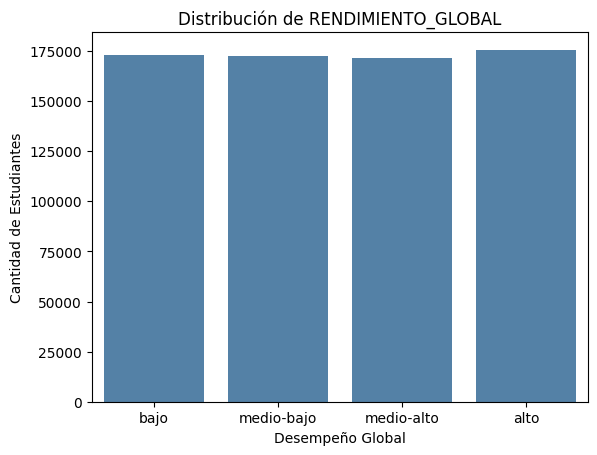

In [ ]:

# Crea un gráfico de barras que muestra la cantidad de estudiantes por cada categoría de 'RENDIMIENTO_GLOBAL'.
# Se especifica el orden de las categorías para el eje x y se personaliza la paleta de colores.
sns.countplot(data=train_data, x='RENDIMIENTO_GLOBAL', order=['bajo', 'medio-bajo', 'medio-alto', 'alto'], palette=['#4682B4'])

# Agrega un título descriptivo al gráfico.
plt.title('Distribución de RENDIMIENTO_GLOBAL')

# Asigna una etiqueta al eje x para describir las categorías del desempeño global.
plt.xlabel('Desempeño Global')

# Asigna una etiqueta al eje y para indicar la cantidad de estudiantes.
plt.ylabel('Cantidad de Estudiantes')

# Muestra el gráfico en pantalla.
plt.show()



### Gráfica:
**"Distribución de RENDIMIENTO_GLOBAL"**  
Esto nos dice que la gráfica muestra cómo se distribuyen los estudiantes según su rendimiento global.

### Ejes:
- **Eje X (horizontal):** Representa las categorías del **Desempeño Global**, dividido en cuatro niveles:
  - **bajo**
  - **medio-bajo**
  - **medio-alto**
  - **alto**

- **Eje Y (vertical):** Representa la **Cantidad de Estudiantes** en cada categoría.

### Barras:
Cada barra representa la cantidad de estudiantes que están en cada nivel de rendimiento global. Todas las barras son muy similares en altura (alrededor de 175,000 estudiantes por categoría), lo cual indica que los estudiantes están **equitativamente distribuidos** entre las cuatro categorías de desempeño.

### General:
La gráfica muestra que el rendimiento global de los estudiantes está **balanceado**, es decir, hay más o menos la misma cantidad de estudiantes en cada nivel de desempeño (bajo, medio-bajo, medio-alto y alto). Esto podría indicar que los criterios para clasificar el rendimiento fueron diseñados para dividir la población estudiantil de manera equitativa.

*Estadisticas y graficos para columnas numéricas*

In [ ]:

# Verifica si hay columnas numéricas en el diccionario 'columnas'.
if columnas['numericas']:
    # Si existen, imprime un encabezado para indicar que se mostrará el resumen estadístico.
    print("\nResumen estadístico de las columnas numéricas:")

    # Genera un resumen estadístico de las columnas numéricas utilizando el método describe().
    # Incluye estadísticas como la media, desviación estándar, mínimo, máximo, etc.
    print(train_data[columnas['numericas']].describe())


Resumen estadístico de las columnas numéricas:
                  ID        PERIODO         coef_1         coef_2  \
count  692500.000000  692500.000000  692500.000000  692500.000000   
mean   494606.130576   20198.366679       0.268629       0.259996   
std    285585.209455      10.535037       0.122130       0.093480   
min         1.000000   20183.000000       0.000000       0.000000   
25%    247324.750000   20195.000000       0.203000       0.212000   
50%    494564.500000   20195.000000       0.240000       0.271000   
75%    741782.500000   20203.000000       0.314000       0.309000   
max    989286.000000   20213.000000       0.657000       0.487000   

              coef_3         coef_4  
count  692500.000000  692500.000000  
mean        0.262087       0.262903  
std         0.058862       0.067944  
min         0.000000       0.000000  
25%         0.254000       0.255000  
50%         0.276000       0.285000  
75%         0.293000       0.303000  
max         0.320000      

Grafico de frecuencias

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


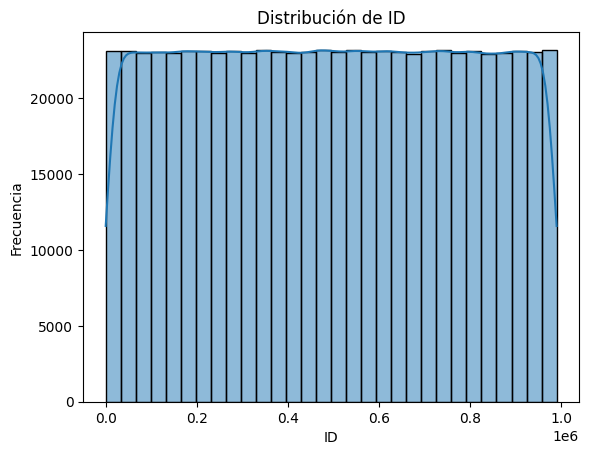

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


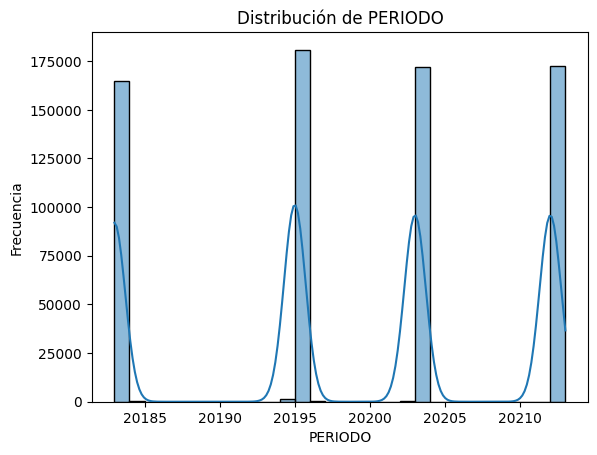

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


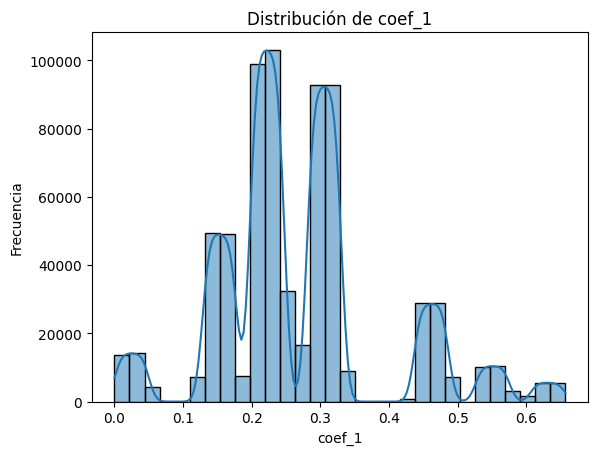

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


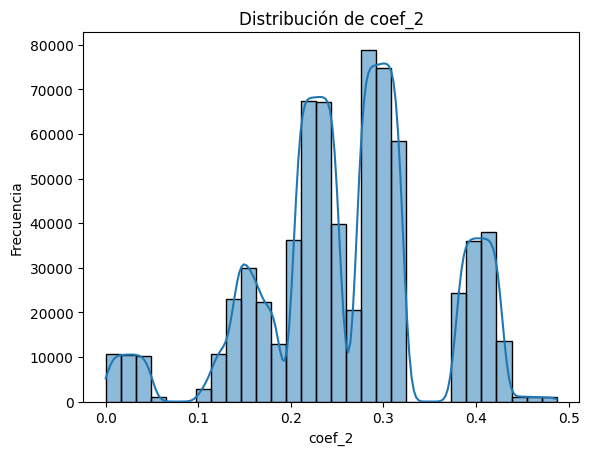

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


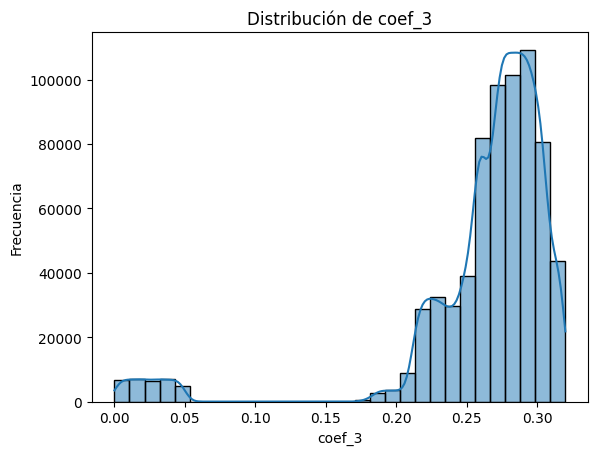

<ipython-input-10-acc0eb7698f1>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])


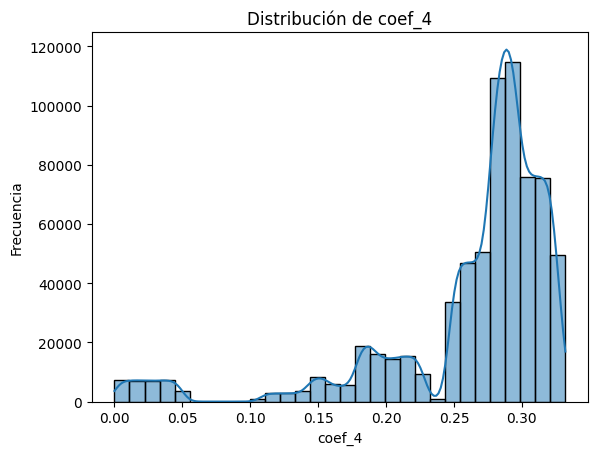

In [ ]:

# Recorre cada columna numérica en la lista 'columnas['numericas']'.
for col in columnas['numericas']:
    # Genera un histograma para la columna actual utilizando Seaborn.
    # Incluye una línea de densidad (kde=True) para visualizar mejor la distribución.
    # Se define el número de barras (bins=30) y un color específico para el gráfico.
    sns.histplot(train_data[col], kde=True, bins=30, palette=['#4682B4'])

    # Agrega un título que incluye el nombre de la columna actual.
    plt.title(f'Distribución de {col}')

    # Etiqueta del eje x con el nombre de la columna.
    plt.xlabel(col)

    # Etiqueta del eje y que muestra "Frecuencia".
    plt.ylabel('Frecuencia')

    # Muestra el gráfico generado.
    plt.show()

Matriz de correlación

### Distribucion ID
La variable ID tiene una distribución aproximadamente uniforme en el rango de 0 a 1 millón, lo que significa que todos los rangos de valores dentro de este intervalo tienen una frecuencia de aparición similar en el conjunto de datos.

### Distribucion del periodo
 la variable PERIODO se concentra en cuatro valores discretos distintos, aproximadamente centrados en 2018.5, 2019.5, 2020.5 y 2021.5. Cada uno de estos períodos tiene una frecuencia de aparición muy alta y similar, mientras que los valores de PERIODO entre estos puntos son muy raros o inexistentes en el conjunto de datos. Esto podría indicar que los datos están agrupados por estos cuatro períodos específicos.

 ### Coef_1
 la variable coef_1 es multimodal, con varios rangos de valores que ocurren con mayor frecuencia. El valor más común de coef_1 se encuentra alrededor de 0.22-0.24. La frecuencia de los valores de coef_1 varía considerablemente a lo largo del rango observado, indicando una distribución no uniforme.

 ### coef_2
 la variable coef_2 es multimodal, con varios rangos de valores que ocurren con mayor frecuencia. El valor más común de coef_2 se encuentra alrededor de 0.31. La frecuencia de los valores de coef_2 varía considerablemente a lo largo del rango observado, indicando una distribución compleja con múltiples modos o concentraciones.

 ### coef_3
 la variable coef_3 muestra una fuerte concentración de valores alrededor de 0.28-0.30. También hay una concentración menor de valores cercanos a 0. Existe una región de valores entre aproximadamente 0.06 y 0.18 que son muy raros en el conjunto de datos. La distribución general sugiere la presencia de al menos dos grupos distintos de valores para la variable coef_3.

 ### coef_4
 la variable coef_4 está dominada por una fuerte concentración de valores alrededor de 0.29. También existen concentraciones secundarias de menor frecuencia alrededor de 0.02 y 0.18. La distribución general sugiere la presencia de varios grupos distintos de valores para la variable coef_4, con una clara predominancia de los valores cercanos a 0.29.


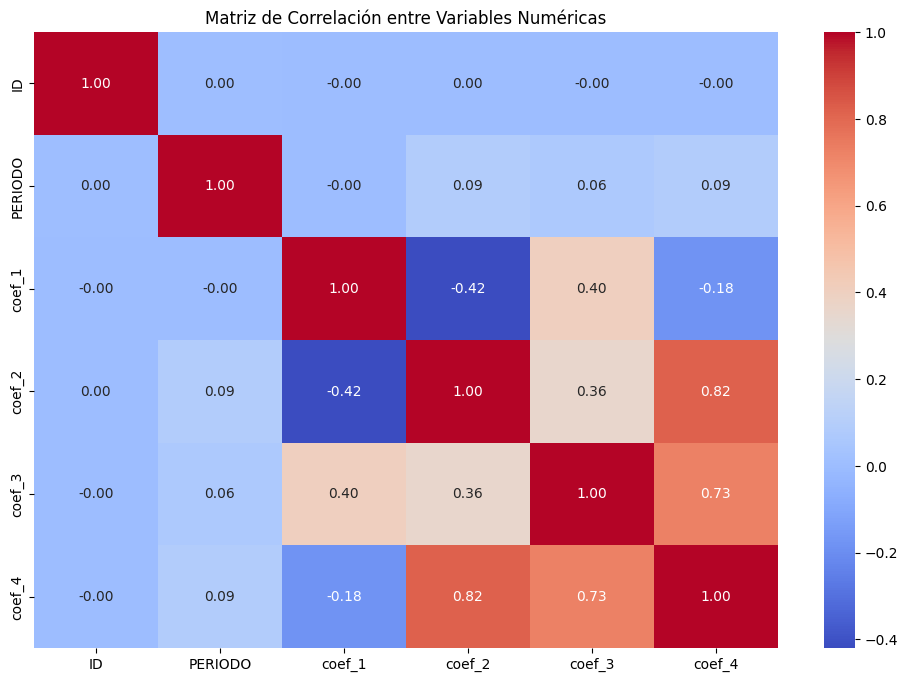

In [ ]:

# Selecciona las columnas numéricas (de tipo float64 e int64) del DataFrame.
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calcula la matriz de correlación entre las columnas numéricas.
# La matriz muestra cómo se relacionan las variables entre sí (valores entre -1 y 1).
correlation_matrix = train_data[numeric_columns].corr()

# Configura el tamaño de la figura para que el heatmap sea legible.
plt.figure(figsize=(12, 8))

# Crea un heatmap (mapa de calor) para visualizar la matriz de correlación.
# Incluye los valores anotados (annot=True) y una escala de colores (cmap='coolwarm') para diferenciar las correlaciones.
# fmt=".2f" asegura que los valores se muestren con dos decimales.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Agrega un título al gráfico para describir el contenido.
plt.title('Matriz de Correlación entre Variables Numéricas')

# Muestra el gráfico en pantalla.
plt.show()

Gráfico.
* **Ejes (X e Y):** Ambos ejes representan las variables numéricas que se están comparando. En este caso, las variables son: ID, PERIODO, coef_1, coef_2, coef_3 y coef_4.
* **Celdas:** Cada celda en la matriz representa la correlación entre la variable de la fila y la variable de la columna correspondiente.
* **Valores numéricos:** Dentro de cada celda, se muestra el coeficiente de correlación. Este valor numérico varía entre -1 y 1:
    * **1:** Indica una correlación positiva perfecta (cuando una variable aumenta, la otra también aumenta de manera lineal y perfecta).
    * **-1:** Indica una correlación negativa perfecta (cuando una variable aumenta, la otra disminuye de manera lineal y perfecta).
    * **0:** Indica que no hay una correlación lineal entre las dos variables.
    * Valores entre -1 y 1 indican la fuerza y la dirección de la correlación lineal. Cuanto más cerca esté el valor a 1 o -1, más fuerte será la correlación.
* **Mapa de calor (colores):** Los colores de las celdas representan la magnitud y la dirección de la correlación. En este caso, se utiliza un espectro de colores donde:
    * **Rojo intenso:** Generalmente indica una fuerte correlación positiva (valores cercanos a 1).
    * **Azul intenso:** Generalmente indica una fuerte correlación negativa (valores cercanos a -1).
    * **Blanco o colores claros:** Generalmente indican una correlación débil o cercana a cero (valores cercanos a 0).
* **Barra de color (a la derecha):** Esta barra indica la escala de los coeficientes de correlación y el color correspondiente.

**Interpretación detallada de la matriz de correlación:**

Vamos a analizar las correlaciones entre las diferentes variables:

* **Correlación de una variable consigo misma:** La diagonal principal (de la esquina superior izquierda a la inferior derecha) siempre tiene un valor de 1.00. Esto es porque cada variable está perfectamente correlacionada consigo misma. Las celdas correspondientes son de un rojo intenso.

* **Correlación entre ID y otras variables:**
    * ID con PERIODO: 0.00 (correlación muy débil o nula).
    * ID con coef_1: -0.00 (correlación muy débil o nula).
    * ID con coef_2: 0.00 (correlación muy débil o nula).
    * ID con coef_3: -0.00 (correlación muy débil o nula).
    * ID con coef_4: -0.00 (correlación muy débil o nula).
    * **Conclusión:** La variable ID no muestra una correlación lineal significativa con ninguna de las otras variables.

* **Correlación entre PERIODO y otras variables:**
    * PERIODO con coef_1: -0.00 (correlación muy débil o nula).
    * PERIODO con coef_2: 0.09 (correlación positiva muy débil).
    * PERIODO con coef_3: 0.06 (correlación positiva muy débil).
    * PERIODO con coef_4: 0.09 (correlación positiva muy débil).
    * **Conclusión:** La variable PERIODO tampoco muestra una correlación lineal fuerte con las variables de coeficiente.

* **Correlaciones entre las variables de coeficiente (coef_1, coef_2, coef_3, coef_4):**
    * coef_1 con coef_2: -0.42 (correlación negativa moderada). Cuando coef_1 aumenta, coef_2 tiende a disminuir en cierta medida.
    * coef_1 con coef_3: 0.40 (correlación positiva moderada). Cuando coef_1 aumenta, coef_3 tiende a aumentar en cierta medida.
    * coef_1 con coef_4: -0.18 (correlación negativa débil).
    * coef_2 con coef_3: 0.36 (correlación positiva débil a moderada).
    * coef_2 con coef_4: 0.82 (correlación positiva muy fuerte). Cuando coef_2 aumenta, coef_4 tiende a aumentar significativamente de manera lineal.
    * coef_3 con coef_4: 0.73 (correlación positiva fuerte). Cuando coef_3 aumenta, coef_4 tiende a aumentar significativamente de manera lineal.



*Estadisticas y graficos para columnas categoricas*

In [ ]:
# Recorre cada columna categórica en la lista 'columnas['categoricas']'.
for col in columnas['categoricas']:
    # Imprime un encabezado indicando la columna categórica actual.
    print(f"\nDistribución de la columna categórica: {col}")

    # Muestra la distribución de valores en la columna actual.
    # Cuenta la cantidad de veces que aparece cada valor único en la columna
    # y los muestra ordenados en orden descendente.
    print(train_data[col].value_counts())


Distribución de la columna categórica: ESTU_PRGM_ACADEMICO
ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
DEPORTE Y ACTIVIDADA FISICA                                   1
QUIMICA Y FARMACIA                                            1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES        1
COMUNICACIÓN SOCIAL Y PERIODISMO                              1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

Distribución de la columna categórica: ESTU_PRGM_DEPARTAMENTO
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO    

Gráfico de barras

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


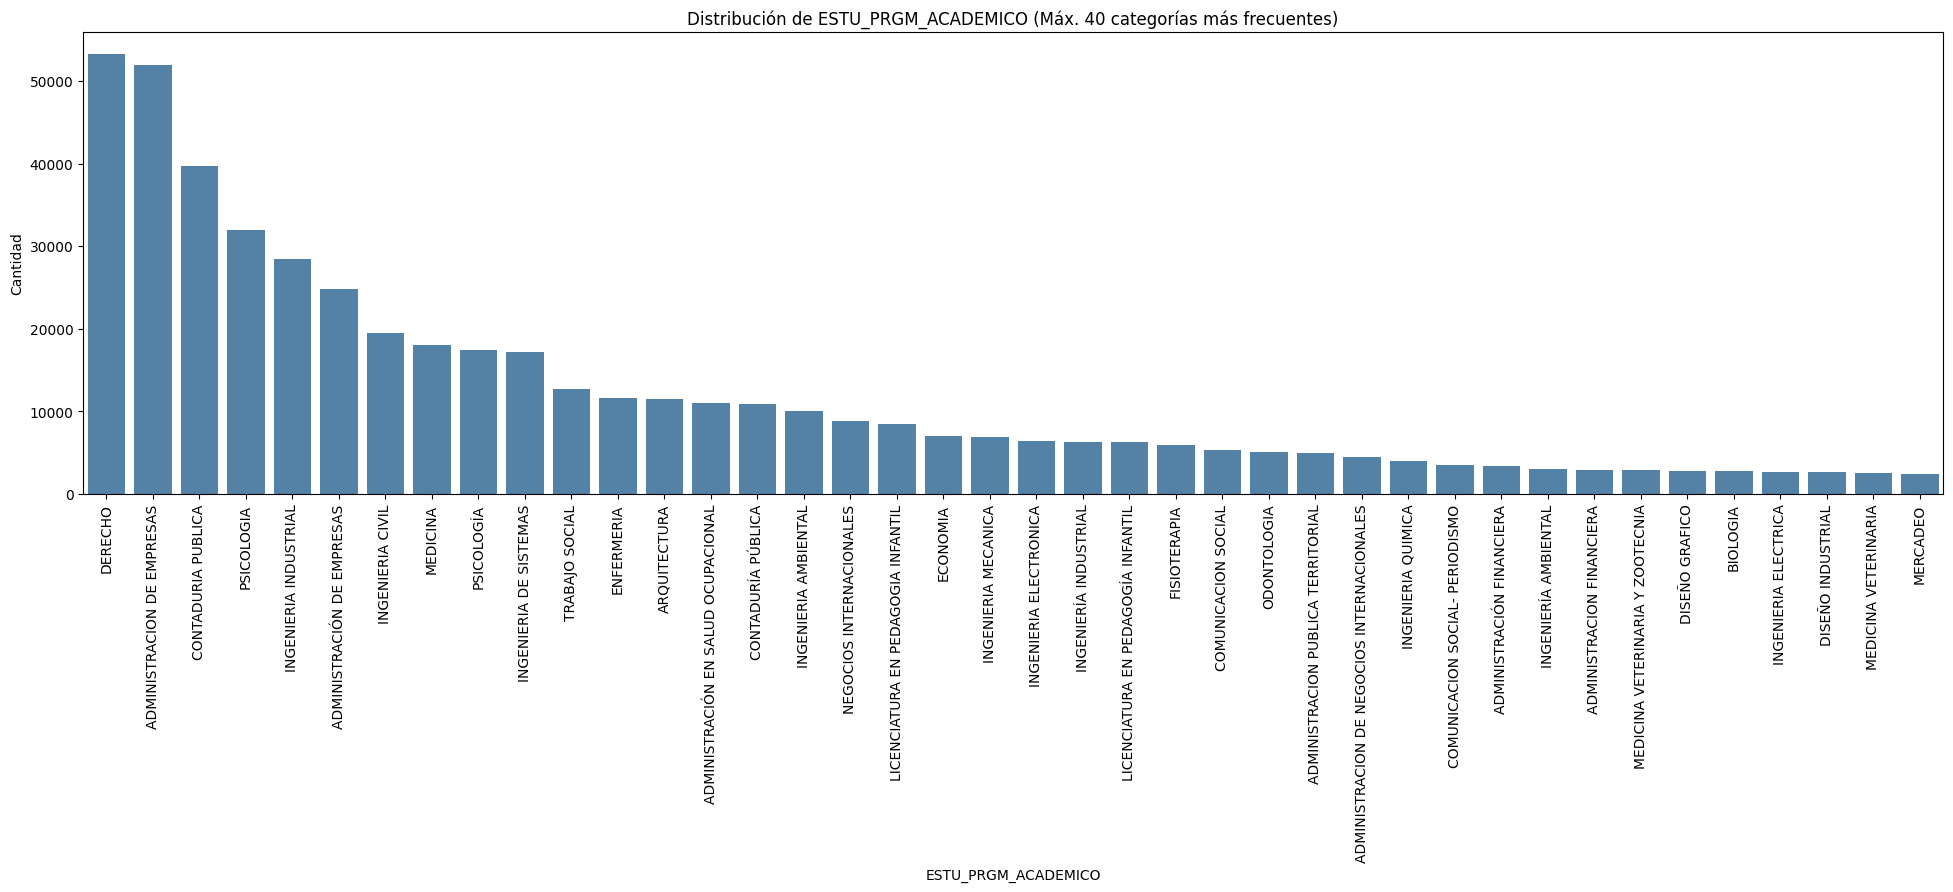

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


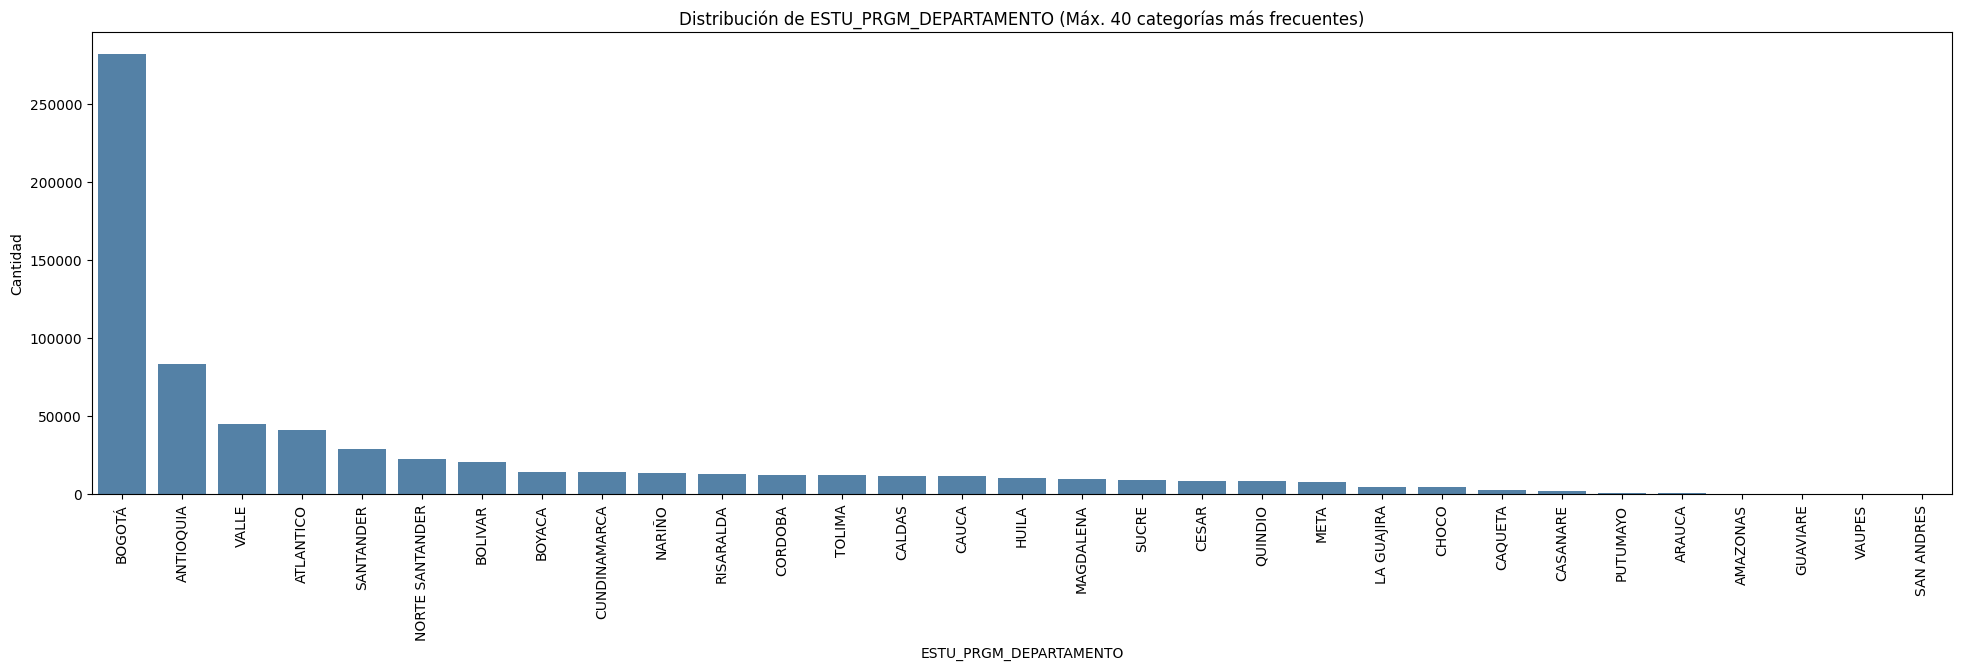

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


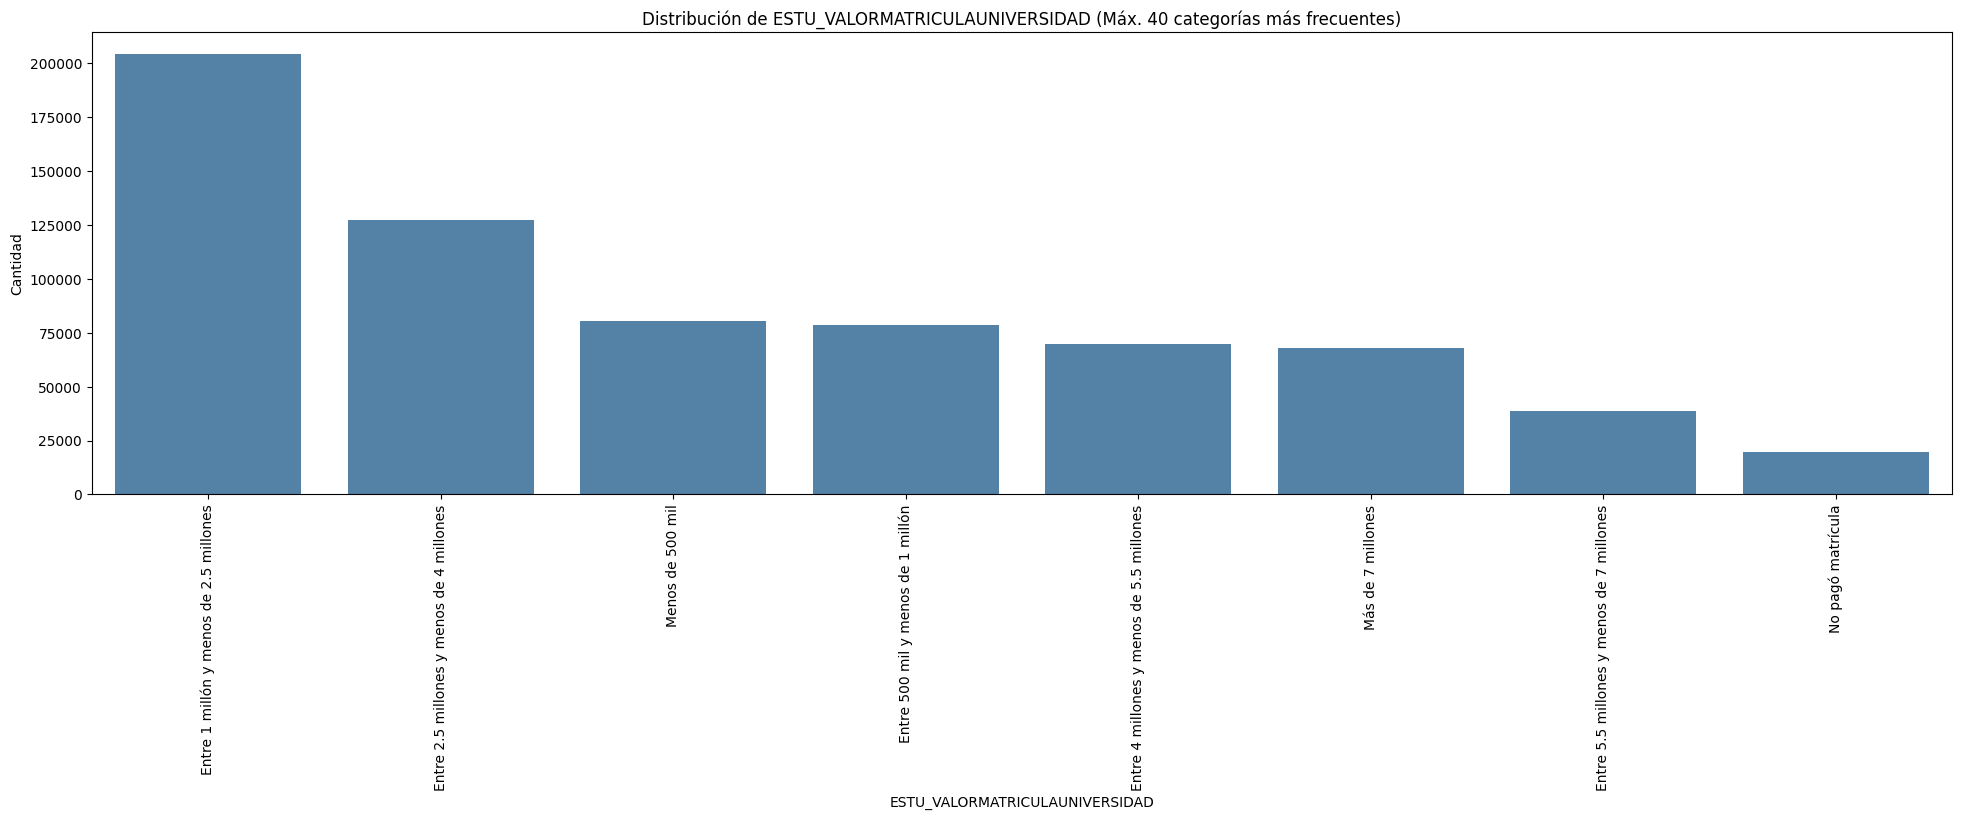

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


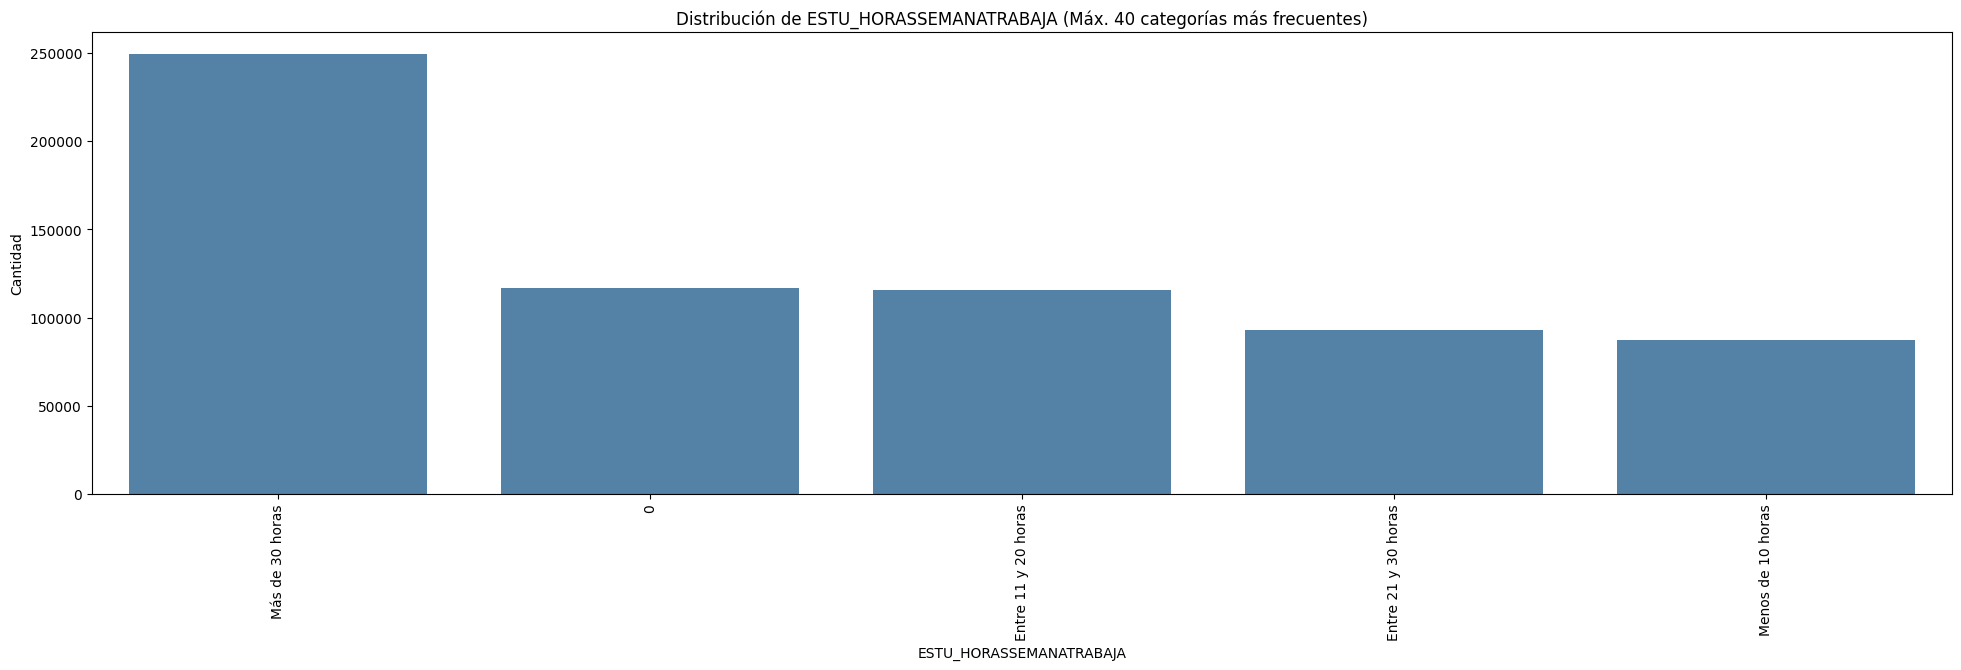

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


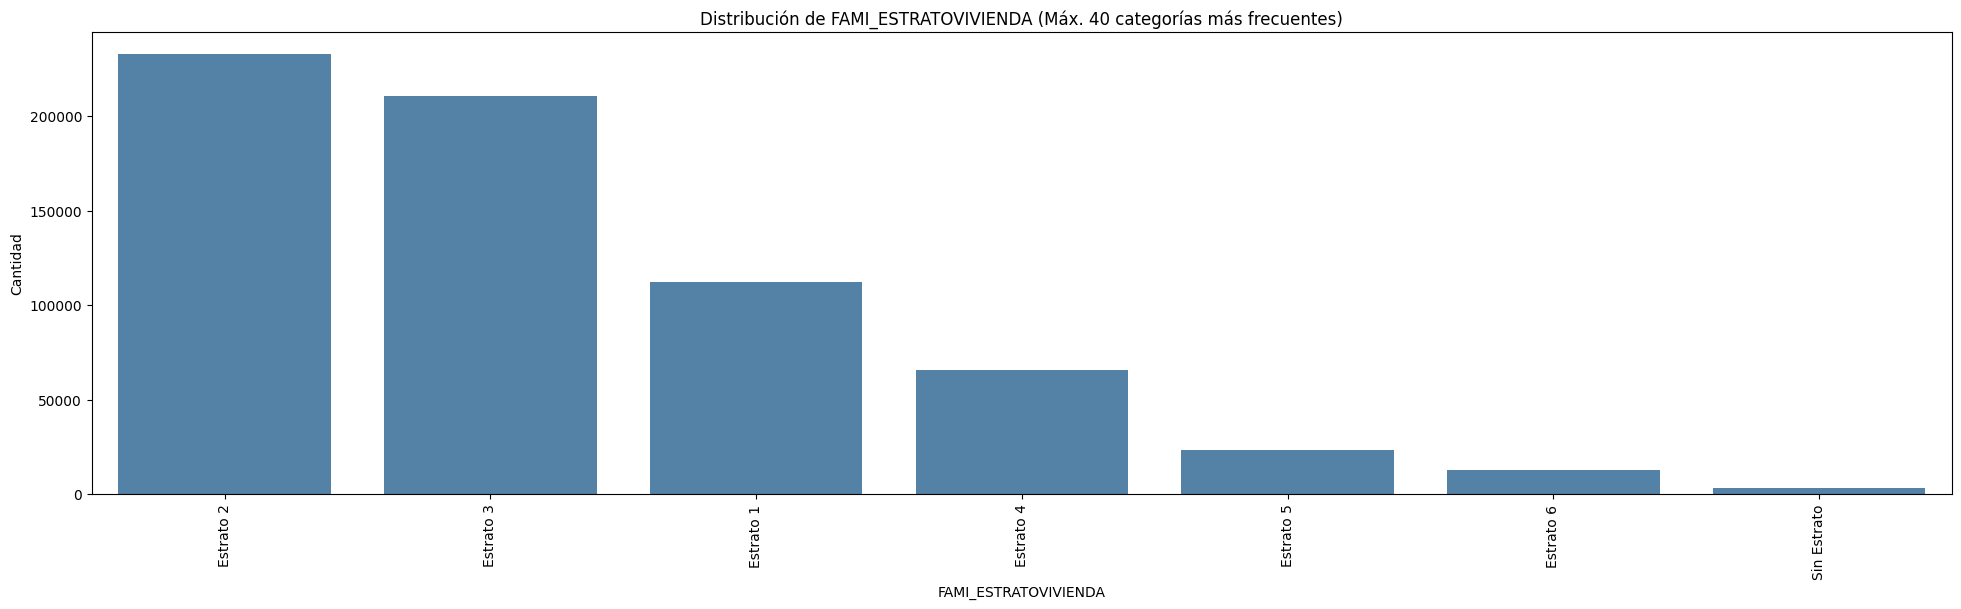

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


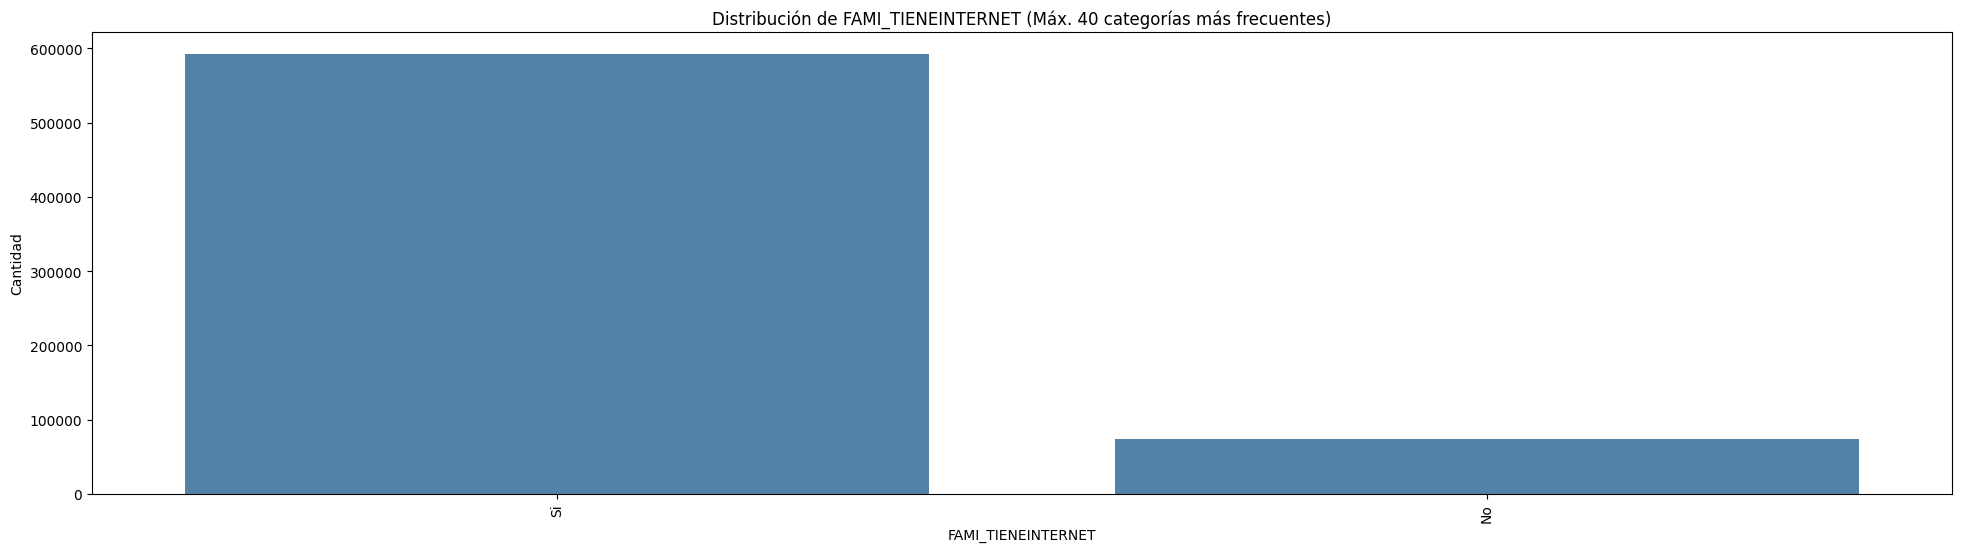

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


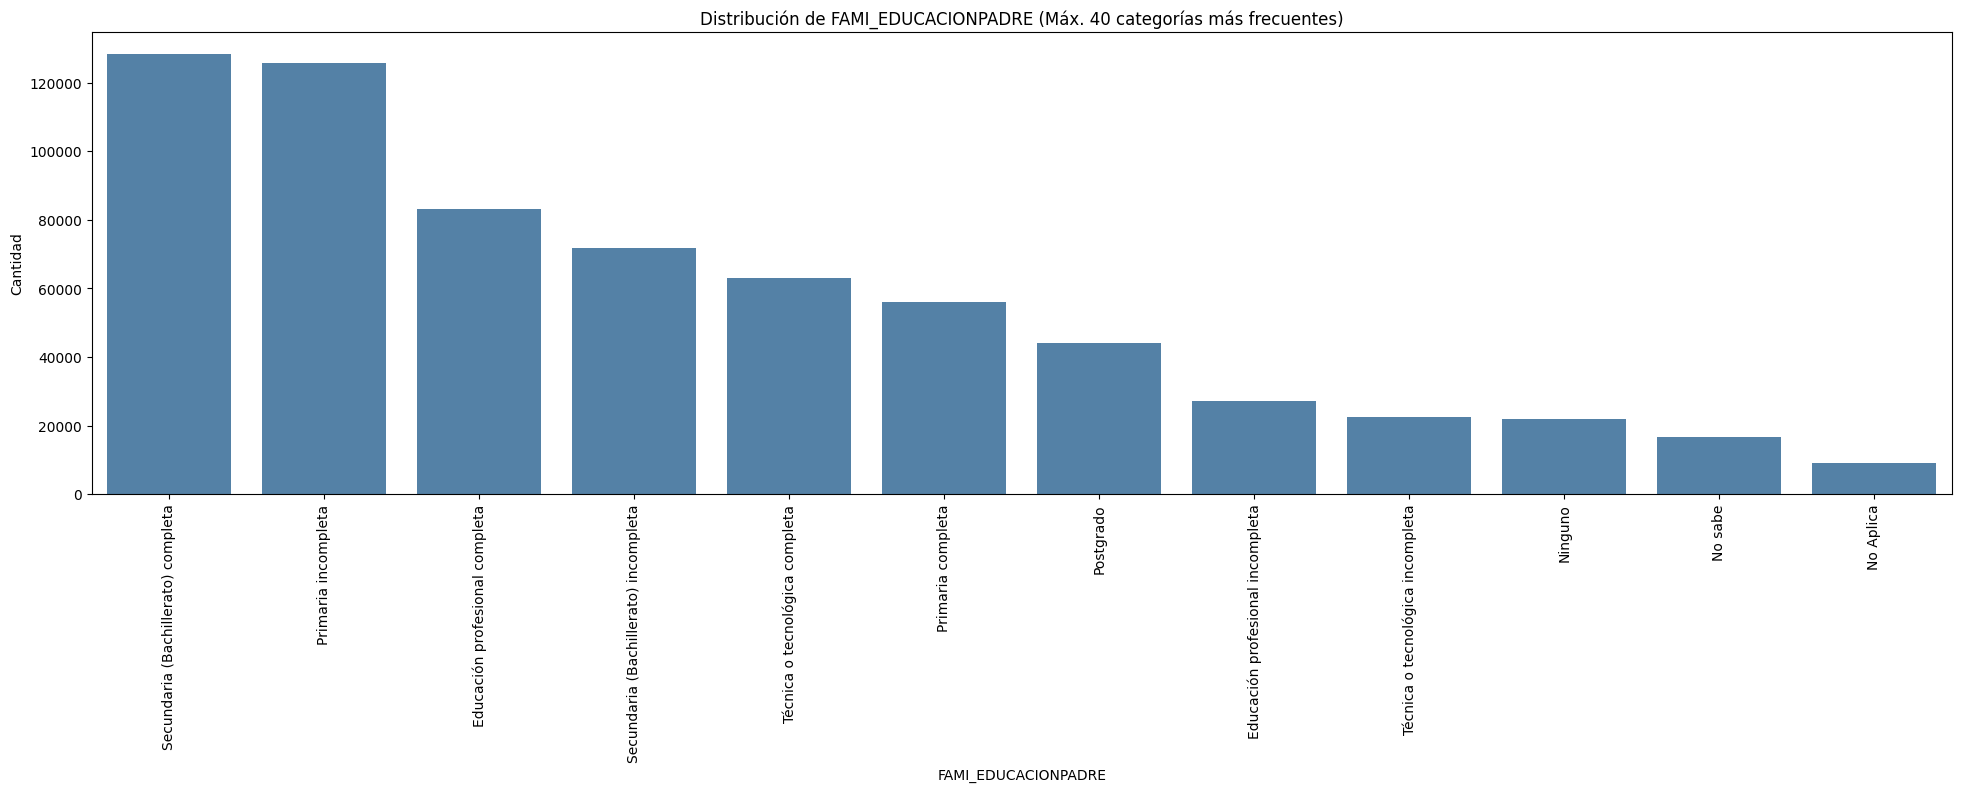

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


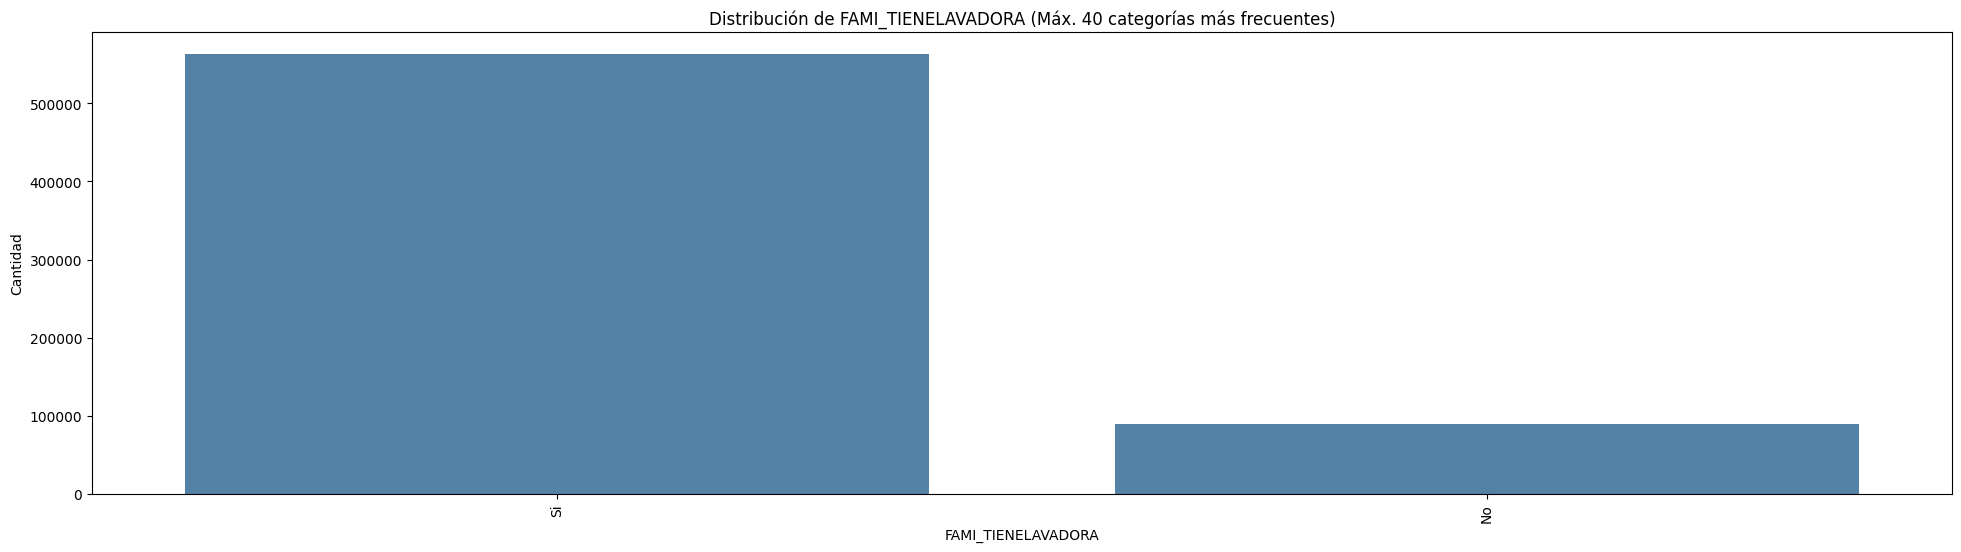

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


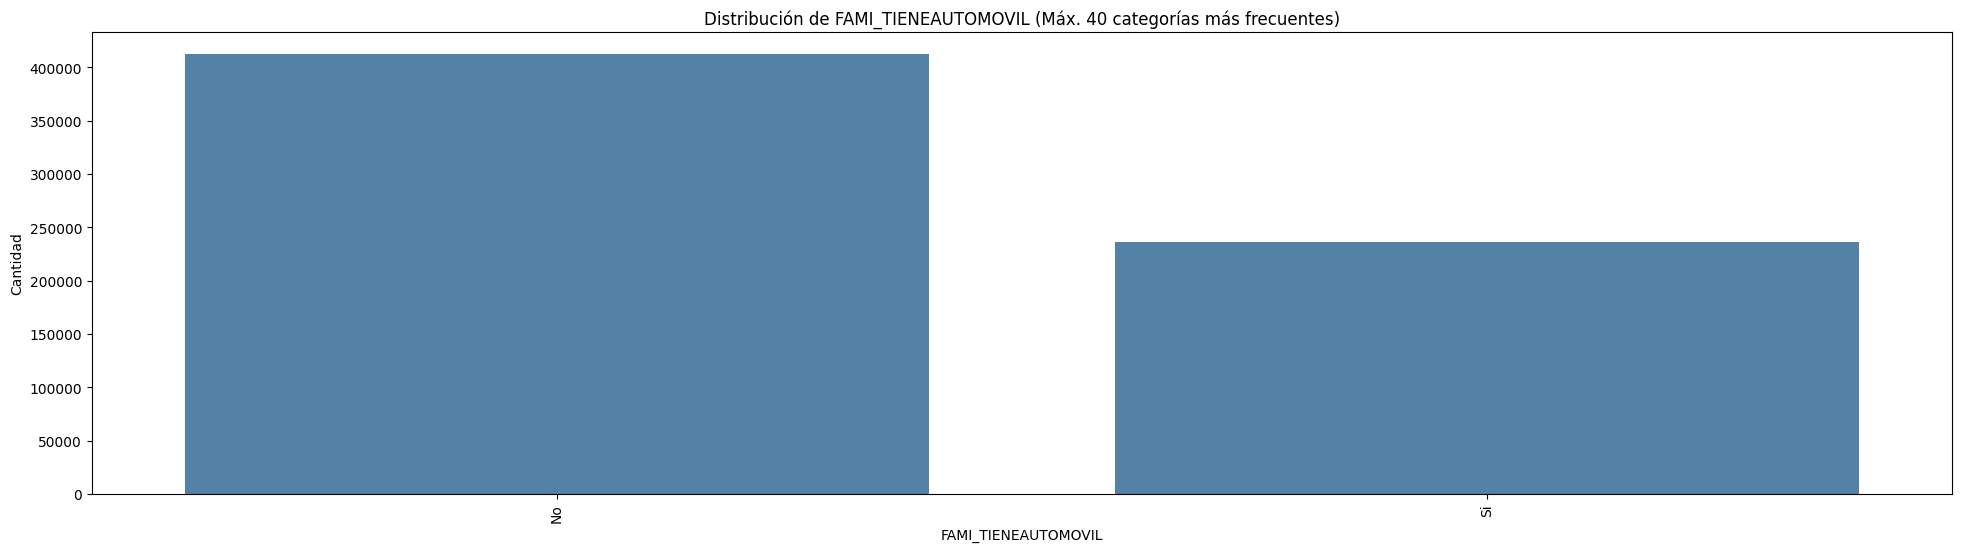

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


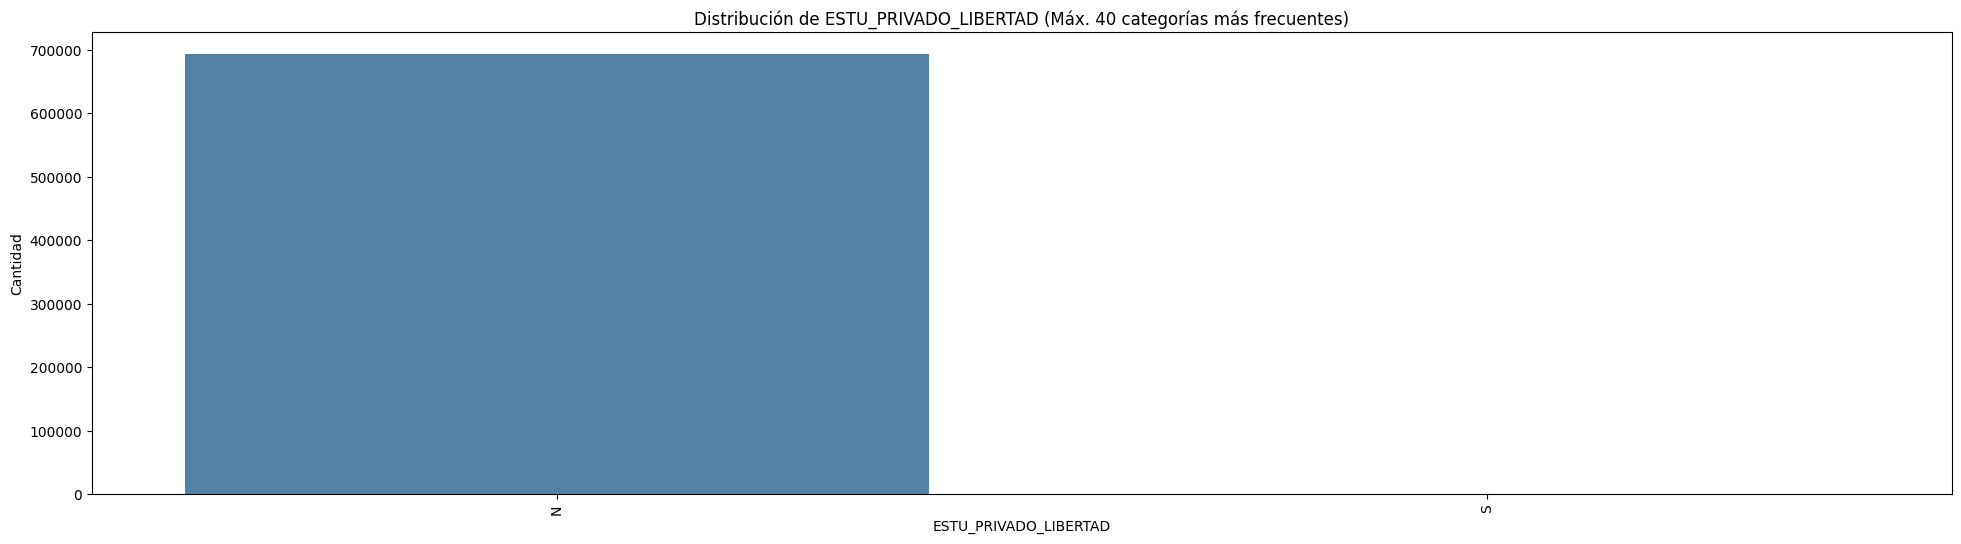

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


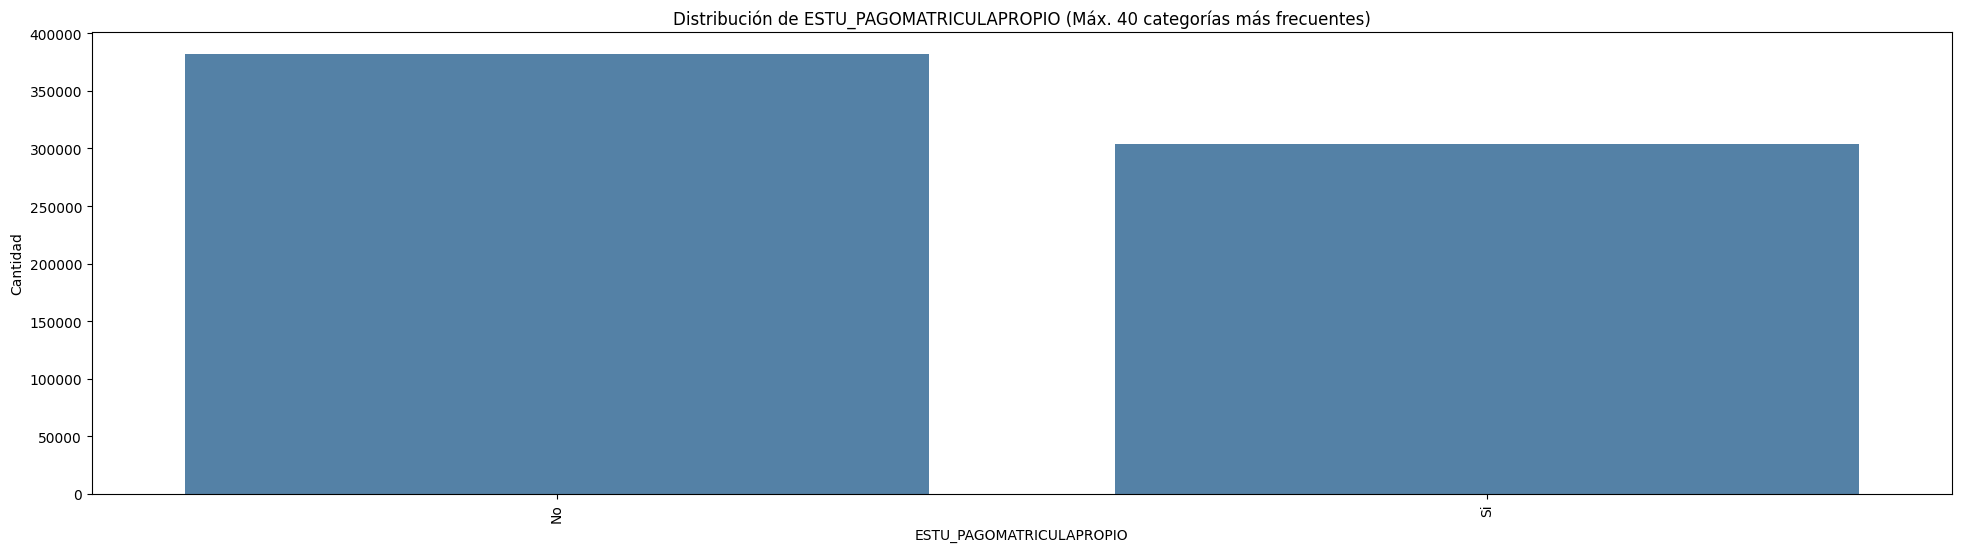

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


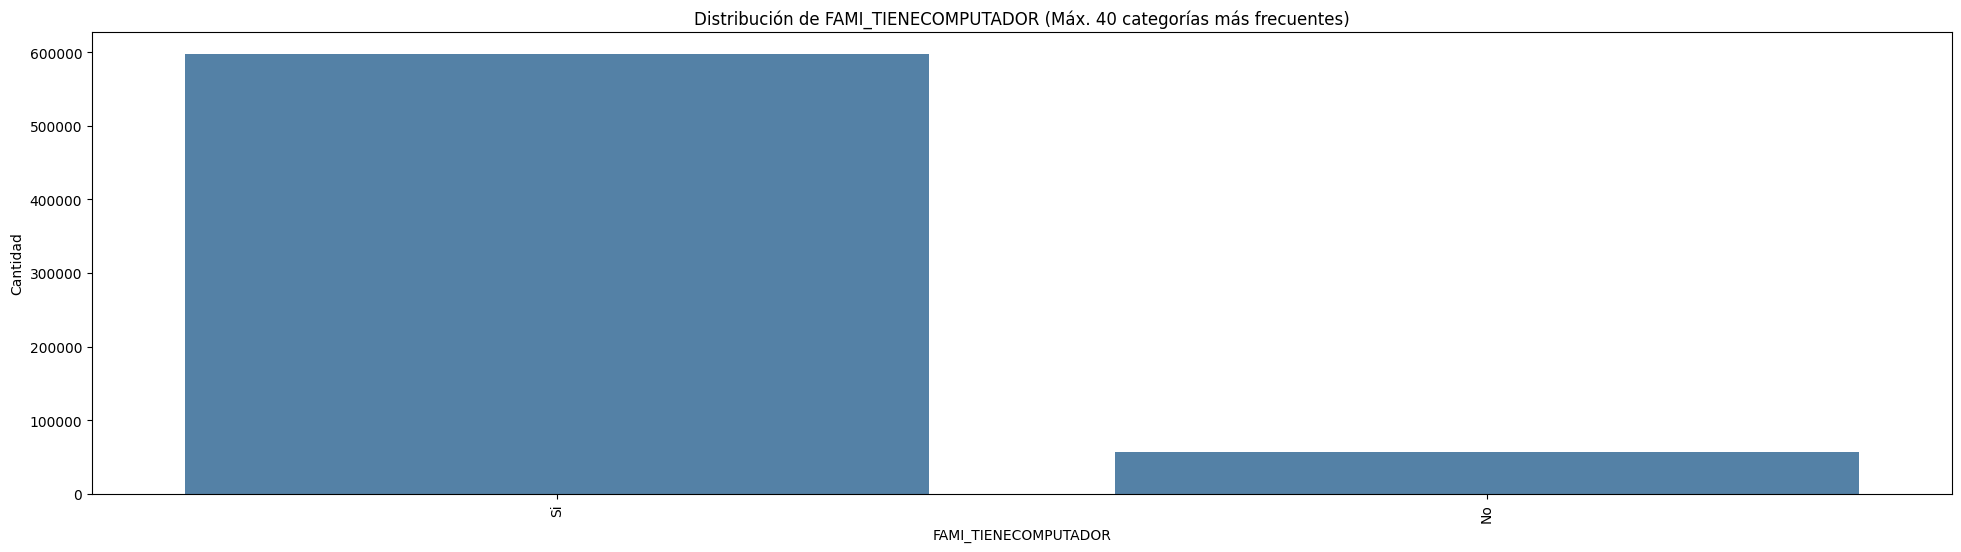

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


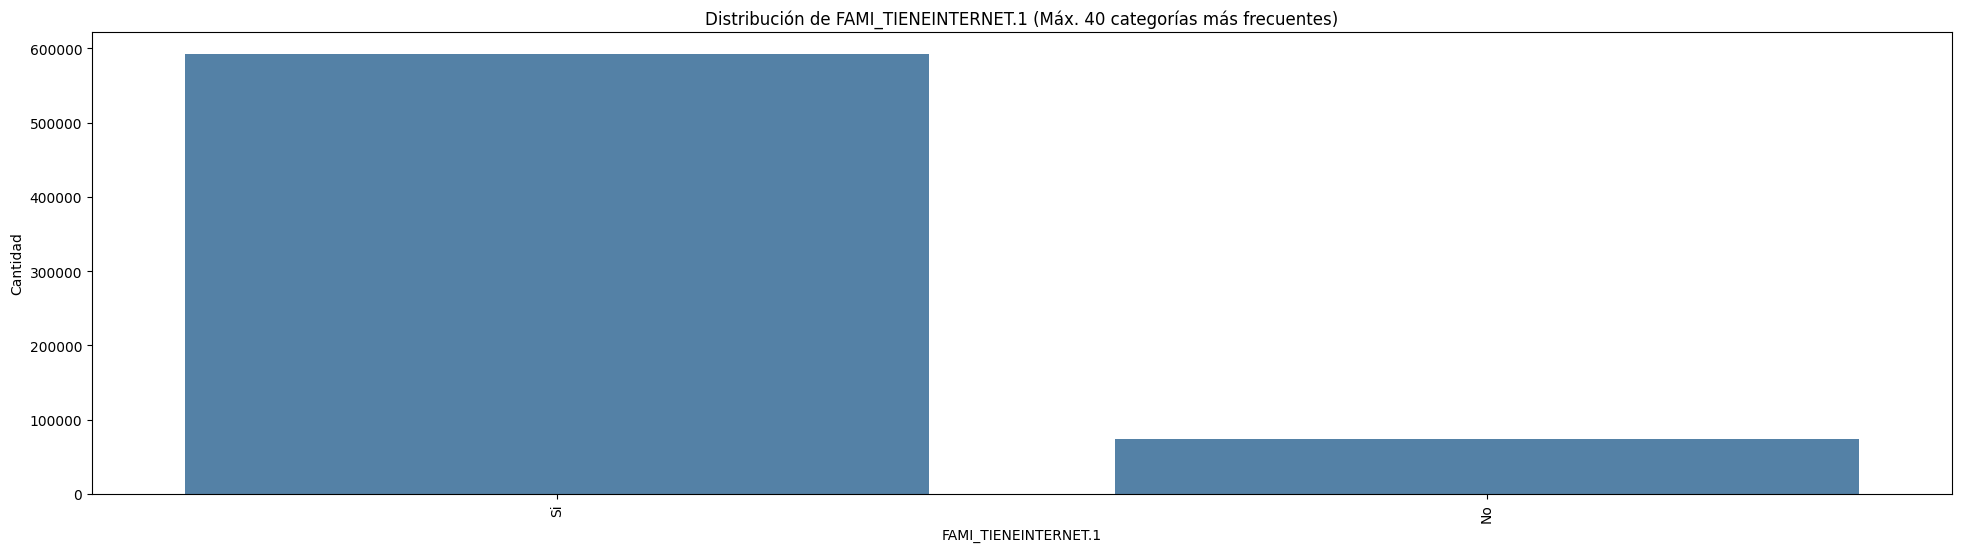

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


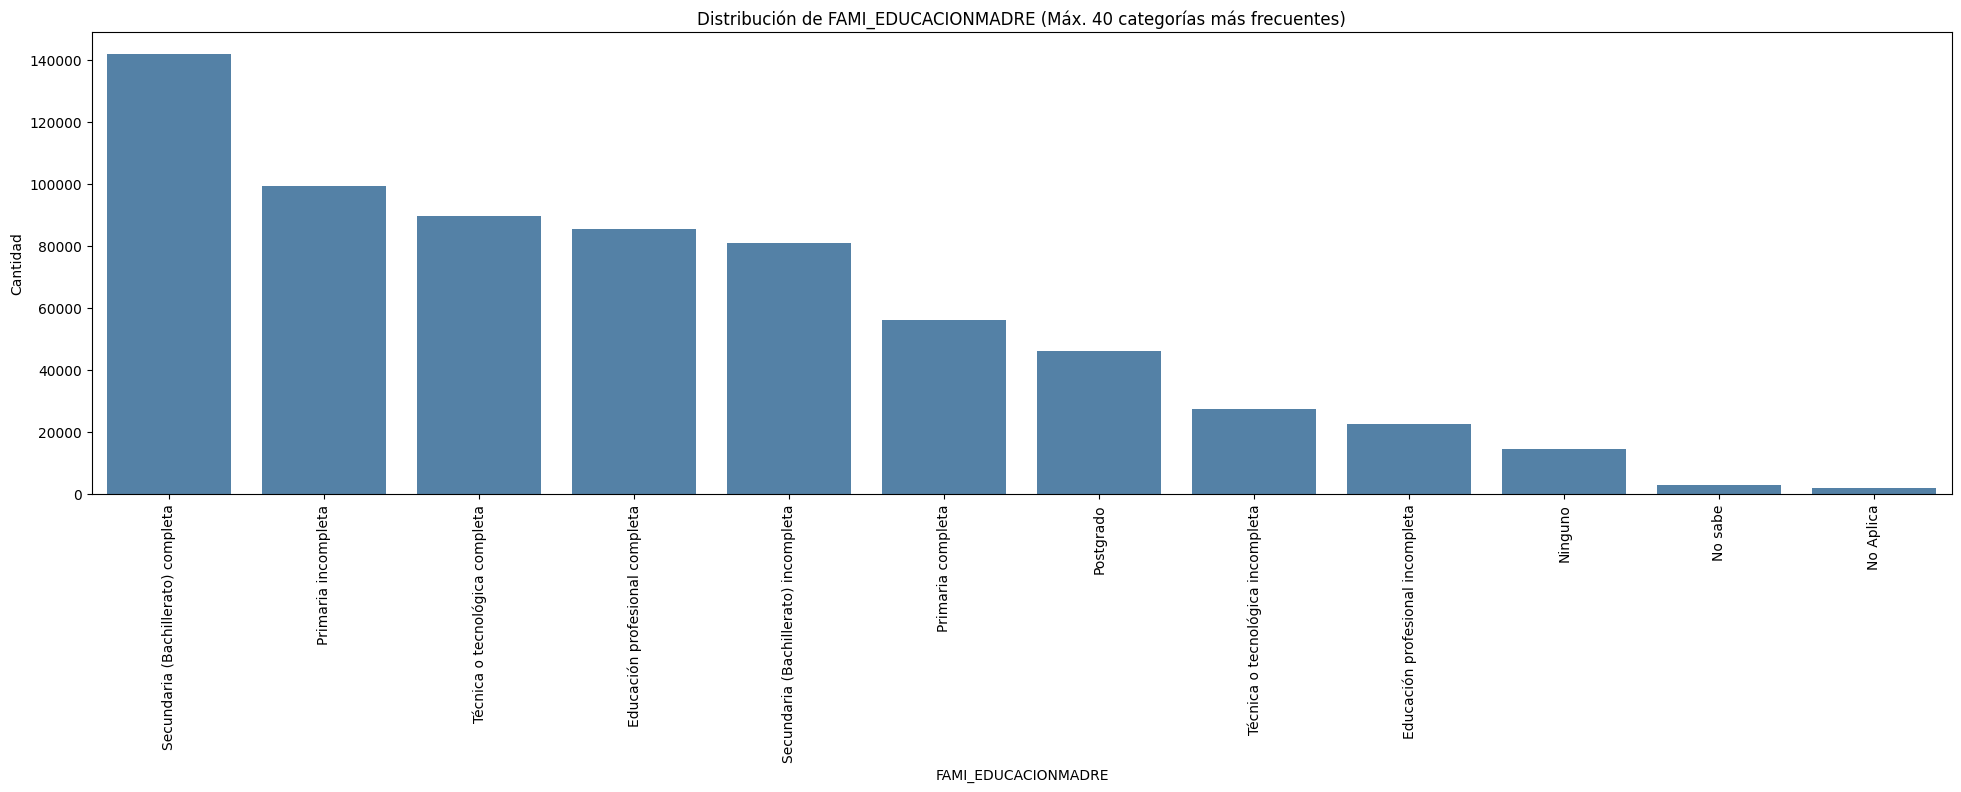

<ipython-input-12-877f9048c0d4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)
<ipython-input-12-877f9048c0d4>:19: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)


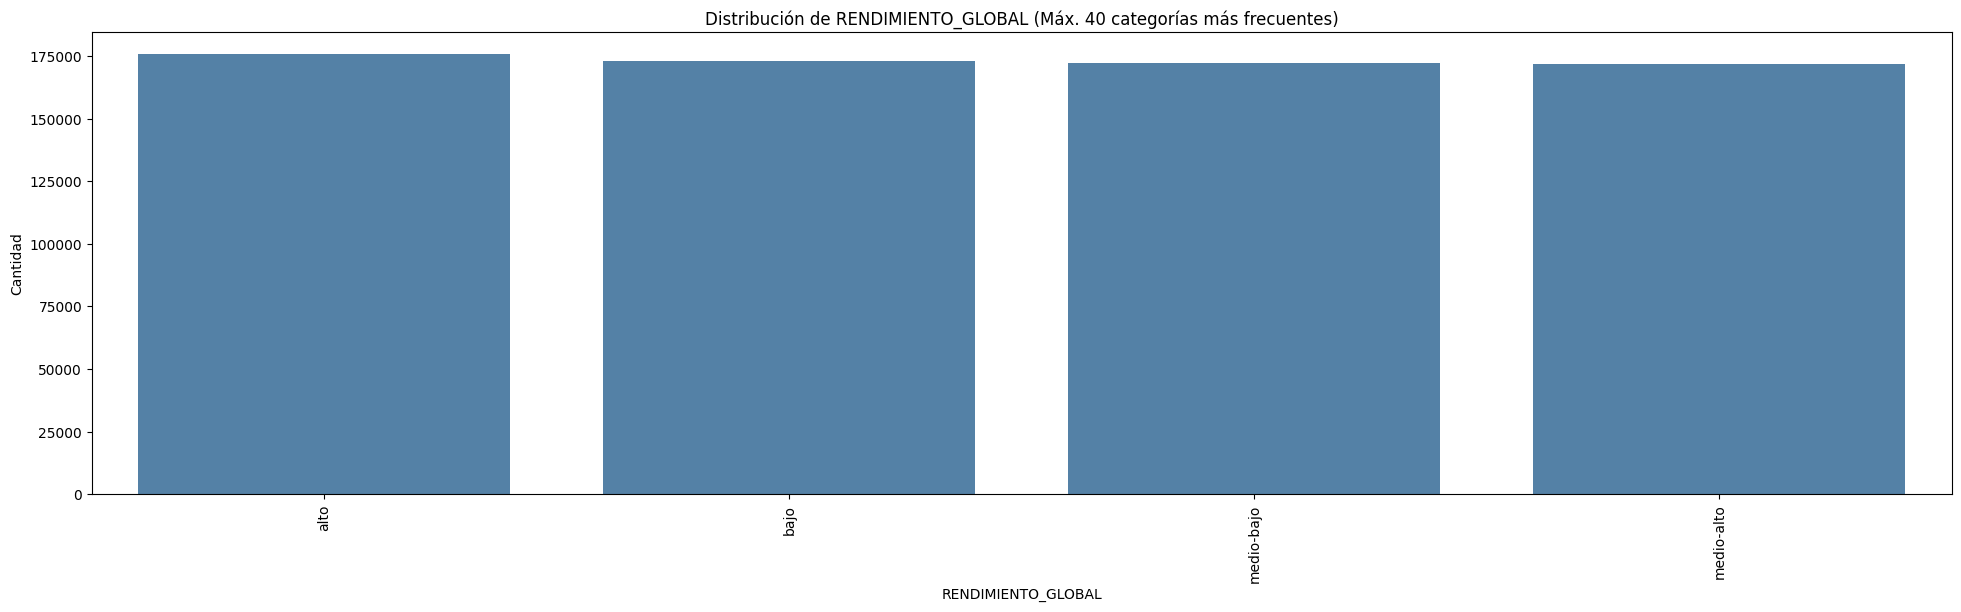

In [ ]:

# Recorre cada columna categórica en la lista 'columnas['categoricas']'.
for col in columnas['categoricas']:
    # Calcular la frecuencia de los elementos únicos en la columna actual.
    counts = train_data[col].value_counts()

    # Verifica si la columna tiene más de 40 elementos únicos.
    # Si es así, selecciona los 40 elementos más frecuentes.
    if len(counts) > 40:
        counts = counts.head(40)  # Limita a las 40 categorías más frecuentes.

    # Crea un DataFrame temporal que contiene solo las filas con los valores seleccionados.
    temp_df = train_data[train_data[col].isin(counts.index)]

    # Configura el tamaño del gráfico para garantizar que sea legible.
    plt.figure(figsize=(24, 6))

    # Genera un gráfico de barras para mostrar la distribución de las categorías seleccionadas.
    # Utiliza una paleta de colores personalizada y asegura el orden de las categorías.
    sns.countplot(data=temp_df, x=col, palette=['#4682B4'], order=counts.index)

    # Agrega un título descriptivo al gráfico que incluye el nombre de la columna.
    plt.title(f'Distribución de {col} (Máx. 40 categorías más frecuentes)')

    # Asigna etiquetas a los ejes para facilitar la interpretación del gráfico.
    plt.xlabel(col)
    plt.ylabel('Cantidad')

    # Rotar las etiquetas del eje x para evitar solapamientos y mejorar la legibilidad.
    plt.xticks(rotation=90, horizontalalignment='center')

    # Muestra el gráfico en pantalla.
    plt.show()

### Grafica 1
Esta gráfica proporciona una visión clara de la popularidad de los diferentes programas académicos, mostrando cuáles son los más demandados (con mayor número de estudiantes) y cuáles tienen una menor representación dentro de las 50 categorías más frecuentes. "DERECHO" destaca como el programa con la mayor cantidad de estudiantes, seguido por otros programas con una frecuencia gradualmente decreciente

### Grafica 2
Esta gráfica muestra una concentración muy alta de estudiantes en programas académicos ubicados en Bogotá. Antioquia y Valle le siguen, pero con una cantidad significativamente menor de estudiantes. El resto de los departamentos dentro de las 50 categorías más frecuentes tienen una representación mucho menor en comparación. Esto sugiere que la mayoría de los estudiantes en los programas académicos más comunes se encuentran en la capital y en los departamentos de Antioquia y Valle.

### Grafica 3
Esta gráfica muestra que la mayoría de los estudiantes pagan matrículas universitarias que se encuentran en los rangos de "Entre 1 millón y menos de 2.5 millones" y "Entre 2.5 millones y menos de 4 millones". A medida que el valor de la matrícula aumenta, la cantidad de estudiantes que pagan esos valores tiende a disminuir. También hay una cantidad notable de estudiantes que pagan matrículas en los rangos más bajos y un grupo más pequeño que no pagó matrícula.

### Grafica 4
Esta gráfica revela que la mayoría de los estudiantes que trabajan lo hacen durante una cantidad considerable de tiempo a la semana (más de 30 horas). También hay un grupo importante de estudiantes que no trabajan. Las categorías de trabajo a tiempo parcial (entre 11 y 30 horas) tienen una representación intermedia, y una menor proporción de estudiantes trabaja menos de 10 horas a la semana.

### Grafica 5
Esta gráfica muestra una clara distribución de los estudiantes según el estrato socioeconómico de sus viviendas familiares. La mayoría de los estudiantes provienen de familias que residen en viviendas de estratos 2 y 3. A medida que el estrato socioeconómico aumenta, la proporción de estudiantes provenientes de esos estratos disminuye significativamente. Una pequeña proporción de estudiantes no tiene un estrato socioeconómico reportado.

### Grafica 6
Esta gráfica muestra una clara diferencia en el acceso a internet entre las familias de los estudiantes. Una gran mayoría de los estudiantes reportan que sus familias sí tienen acceso a internet, mientras que una minoría significativa reporta que no tienen este acceso. La disparidad entre las alturas de las barras resalta la prevalencia del acceso a internet en la población estudiantil representada en estos datos.

### Grafica 7
Esta gráfica sugiere que los niveles educativos más comunes entre los padres de los estudiantes en este conjunto de datos son la secundaria completa y la primaria incompleta. También hay una proporción significativa de padres con primaria completa y educación profesional completa. Los niveles educativos más altos (postgrado) y la falta de educación formal ("Ninguno") tienen una representación menor en comparación. Las categorías de "No sabe" y "No Aplica" son las menos frecuentes.

### Grafica 8
Esta gráfica muestra una clara diferencia en la posesión de lavadora entre las familias de los estudiantes. Una gran mayoría de los estudiantes reportan que sus familias sí tienen lavadora, mientras que una minoría significativa reporta que no tienen este electrodoméstico. La disparidad entre las alturas de las barras resalta la alta prevalencia de la posesión de lavadora en la población estudiantil representada en estos datos.

### Grafica 9
Esta gráfica revela que, en la población estudiantil representada en estos datos, es más común que las familias no posean un automóvil a que sí lo posean. La diferencia considerable entre las alturas de las barras subraya esta tendencia.

### Grafica 10
Esta gráfica revela una marcada diferencia en la situación de privación de libertad de los estudiantes. Una inmensa mayoría de los estudiantes representados en estos datos no están privados de la libertad, mientras que solo una proporción muy pequeña lo está. La disparidad extrema entre las alturas de las barras enfatiza esta realidad.

### Grafica 11
Esta gráfica revela que hay una ligera mayoría de estudiantes que no pagan su propia matrícula universitaria, lo que implica que sus estudios son financiados por otras fuentes (familiares, becas, créditos, etc.). Sin embargo, también hay una cantidad considerable de estudiantes que sí son responsables del pago de su propia matrícula. La diferencia entre las dos barras no es tan pronunciada como en algunas de las gráficas anteriores, lo que sugiere que ambas situaciones son comunes en la población estudiantil representada en estos datos.

### Grafica 12
Esta gráfica muestra una clara diferencia en la posesión de computador entre las familias de los estudiantes. Una gran mayoría de los estudiantes reportan que sus familias sí tienen computador, mientras que una minoría significativa reporta que no tienen este dispositivo. La disparidad entre las alturas de las barras resalta la alta prevalencia de la posesión de computador en la población estudiantil representada en estos datos.

### Grafica 13

Esta gráfica, similar a la anterior sobre "FAMI_TIENEINTERNET", también muestra que una gran mayoría de los estudiantes reportan que sus familias sí tienen acceso a internet, mientras que una minoría significativa reporta que no tienen este acceso. La disparidad entre las alturas de las barras resalta la prevalencia del acceso a internet en la población estudiantil representada en estos datos, según esta variable específica. La ligera diferencia en el título de la variable ("FAMI_TIENEINTERNET.1") podría indicar una pregunta ligeramente diferente o una repetición de la misma pregunta en el formulario de datos.

### Grafica 14
Esta gráfica sugiere que el nivel educativo más común entre las madres de los estudiantes en este conjunto de datos es la secundaria completa. También hay una proporción significativa de madres con primaria incompleta, técnica o tecnológica completa y educación profesional completa. Los niveles educativos más altos (postgrado) y la falta de educación formal ("Ninguno") tienen una representación menor en comparación. Las categorías de "No sabe" y "No Aplica" son las menos frecuentes. Al comparar con la gráfica del nivel educativo del padre, podemos observar algunas similitudes y diferencias en la distribución del nivel educativo de los progenitores.

### Grafica 15
Esta gráfica indica que el rendimiento global de los estudiantes en este conjunto de datos está distribuido de manera bastante equitativa entre las categorías de "alto", "bajo", "medio-bajo" y "medio-alto". No hay una categoría de rendimiento que predomine significativamente sobre las demás.